In [1]:
import numpy as num
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn import neighbors, datasets

In [2]:
n_neighbors = 20

In [3]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

h = 0.04  

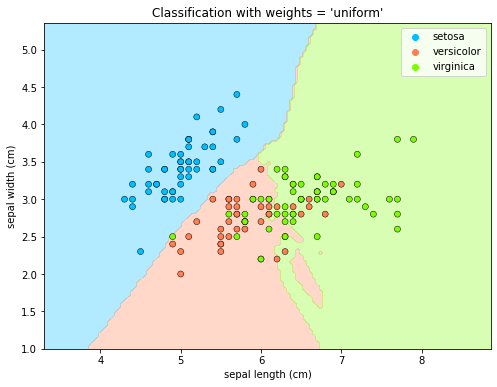

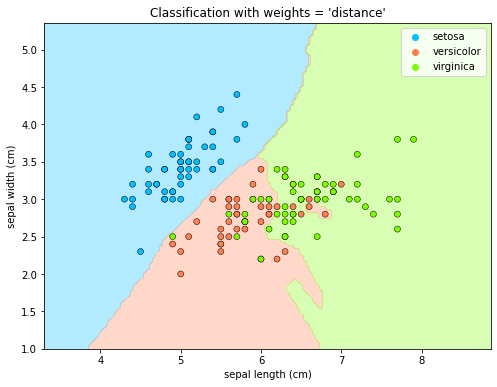

In [8]:
for weights in ["uniform", "distance"]:

    classifier = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    classifier.fit(X, y)


    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = num.meshgrid(num.arange(x_min, x_max, h), num.arange(y_min, y_max, h))
    Z = classifier.predict(num.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plot.figure(figsize=(8, 6))
    plot.contourf(xx, yy, Z, 2, alpha=0.3, colors = ['deepskyblue', 'coral', 'lawngreen'])

    
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette = ["deepskyblue", "coral", "lawngreen"],
        alpha=1.0,
        edgecolor="k",
    )
    plot.xlim(xx.min(), xx.max())
    plot.ylim(yy.min(), yy.max())
    plot.title("Classification with weights = '%s'" % (weights))
    plot.xlabel(iris.feature_names[0])
    plot.ylabel(iris.feature_names[1])

plot.show()